In [13]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [11]:
data = pd.read_csv('./dataset/kdd_cup99_10_percent.csv')
labels = ['dos','normal','prode','r2l','u2r']

In [3]:
Y = data[['attack_type_digit']]
X = data.drop(['label','label_digit','attack_type','attack_type_digit','service'], axis=1)

In [4]:
# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [6]:
rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1,random_state=42)
rnd_clf.fit(X_train,Y_train)

D:\Tool\Python\Anaconda\envs\homl3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

Classification Report:


D:\Tool\Python\Anaconda\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Tool\Python\Anaconda\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Tool\Python\Anaconda\envs\homl3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    129106
           1       0.98      1.00      0.99     32167
           2       1.00      0.90      0.95      1348
           3       0.00      0.00      0.00       387
           4       0.00      0.00      0.00        19

    accuracy                           1.00    163027
   macro avg       0.60      0.58      0.59    163027
weighted avg       0.99      1.00      0.99    163027



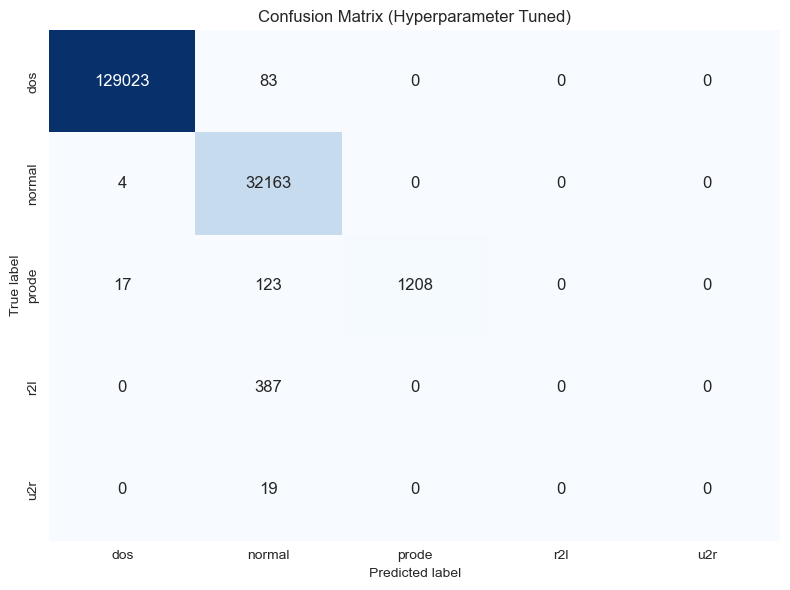

In [15]:
# 3. 预测
y_pred = rnd_clf.predict(X_test)

# 4. 计算指标
print("Classification Report:")
print(classification_report(Y_test, y_pred))

# 5. 混淆矩阵
cm = confusion_matrix(Y_test, y_pred)
# 将混淆矩阵转换为 DataFrame，以便更好地显示
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12})

# 添加标题和标签
plt.title('Confusion Matrix (Hyperparameter Tuned)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('./picture/RandomForest_confusionMatrix.png')
# 显示图表
plt.tight_layout()
plt.show()